<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/tf-keras-api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Keras API - short intro

Some plotting code from: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

dpi = 96
# dpi = 300

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

In [2]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
tf.random.set_seed(42)

In [5]:
# https://cloud.google.com/blog/products/gcp/introducing-nvidia-tesla-p4-gpus-accelerating-virtual-workstations-and-ml-inference-compute-engine

!nvidia-smi

Mon Dec 30 09:43:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    39W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# https://github.com/AndreasMadsen/python-lrcurve
!pip install -q lrcurve 

In [0]:
from lrcurve import KerasLearningCurve

## MNIST data set

In [8]:
import numpy as np
from tensorflow.keras.datasets import mnist, fashion_mnist

x_res = 28
y_res = 28
image_size = x_res * y_res

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(-1, x_res, y_res, 1)
x_test = x_test.reshape(-1, x_res, y_res, 1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
def plot_samples(x, y, n_samples=15, labels=None):
  figure = plt.figure()
  for i, index in enumerate(np.random.choice(x_test.shape[0], size=n_samples, replace=False)):
      ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(x[index].reshape(x_res, y_res), cmap="binary")
      if labels:
        ax.set_title("{}".format(labels[y[index]]))
      else:
        ax.set_title("{}".format(y[index]))        

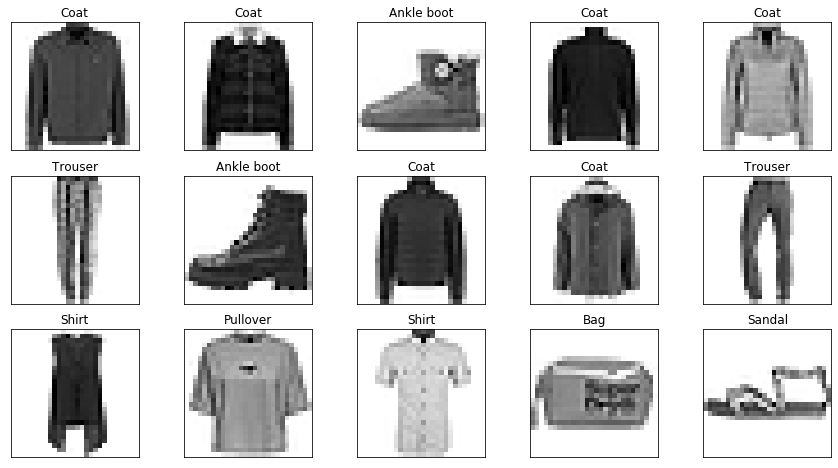

In [10]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


plot_samples(x_train, y_train, labels=fashion_mnist_labels)

## There are a number of different Keras APIs
* For sequential models: 
  * https://www.tensorflow.org/guide/keras/overview
  * https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* For any kind of architecture: https://www.tensorflow.org/guide/keras/functional

### Straight forward sequential model

In [0]:
dropout_rate = 0.4

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras import Sequential, Model

simple_sequential_model = Sequential()

simple_sequential_model.add(Input(shape=(x_res, y_res, 1)))

simple_sequential_model.add(Conv2D(filters=64, kernel_size=4, activation='relu')) 
simple_sequential_model.add(MaxPooling2D())
simple_sequential_model.add(Dropout(rate=dropout_rate))

simple_sequential_model.add(Conv2D(filters=32, kernel_size=4, activation='relu'))
simple_sequential_model.add(MaxPooling2D())
simple_sequential_model.add(Dropout(rate=dropout_rate))

simple_sequential_model.add(Flatten())
simple_sequential_model.add(Dense(256, activation='relu'))
simple_sequential_model.add(BatchNormalization())
simple_sequential_model.add(Dropout(rate=dropout_rate))
simple_sequential_model.add(Dense(10, activation='softmax'))

### Structured sequential model

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import Sequential, Model

conv_block_1 = Sequential([
  Conv2D(filters=64, kernel_size=4, activation='relu'),
  MaxPooling2D(),
  Dropout(rate=dropout_rate)
], name='conv_block_1')

conv_block_2 = Sequential([
  Conv2D(filters=32, kernel_size=4, activation='relu'),
  MaxPooling2D(),
  Dropout(rate=dropout_rate)
], name='conv_block_2')

classifier = Sequential([
  Flatten(),
  Dense(256, activation='relu'),
  BatchNormalization(),
  Dropout(rate=dropout_rate),
  Dense(10, activation='softmax')
], name='classifier')

structured_sequential_model = Sequential([
    Input(shape=(x_res, y_res, 1)),
    conv_block_1,
    conv_block_2,
    classifier
])

### Model using functional API (allows for any architecture)

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import Model

input = Input(shape=(x_res, y_res, 1))

x = conv_block_1(input)
x = conv_block_2(x)

output = classifier(x)

functional_model = Model(input, output)

In [15]:
# model = simple_sequential_model
# model = structured_sequential_model
model = functional_model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_block_1 (Sequential)    (None, 12, 12, 64)        1088      
_________________________________________________________________
conv_block_2 (Sequential)    (None, 4, 4, 32)          32800     
_________________________________________________________________
classifier (Sequential)      (None, 10)                134922    
Total params: 168,810
Trainable params: 168,298
Non-trainable params: 512
_________________________________________________________________


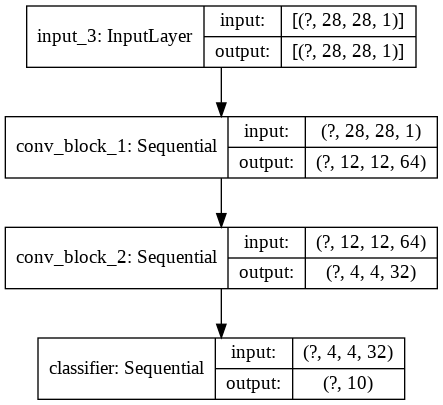

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, dpi=dpi)

In [17]:
%%time

BATCH_SIZE=5000
EPOCHS = 50

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(x_test, y_test),
                    callbacks=[KerasLearningCurve()],
                    verbose=0)

CPU times: user 31 s, sys: 11.9 s, total: 42.9 s
Wall time: 40.2 s


In [18]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

60000/60000 [==============================] - 0s 4us/sample - loss: 0.2595 - accuracy: 0.9135


0.91345

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

10000/10000 [==============================] - 0s 5us/sample - loss: 0.2976 - accuracy: 0.8946


0.8946

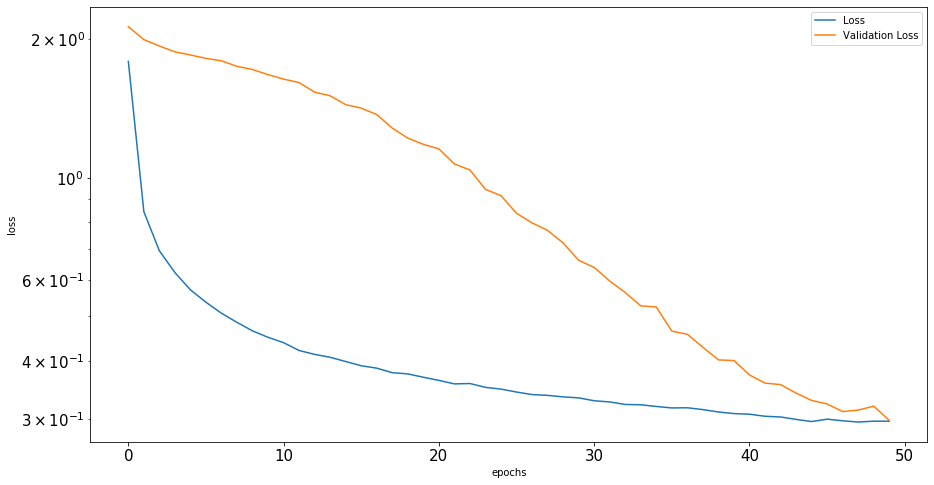

In [20]:
plt.xlabel('epochs')
plt.ylabel('loss')

plt.yscale('log')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss']);

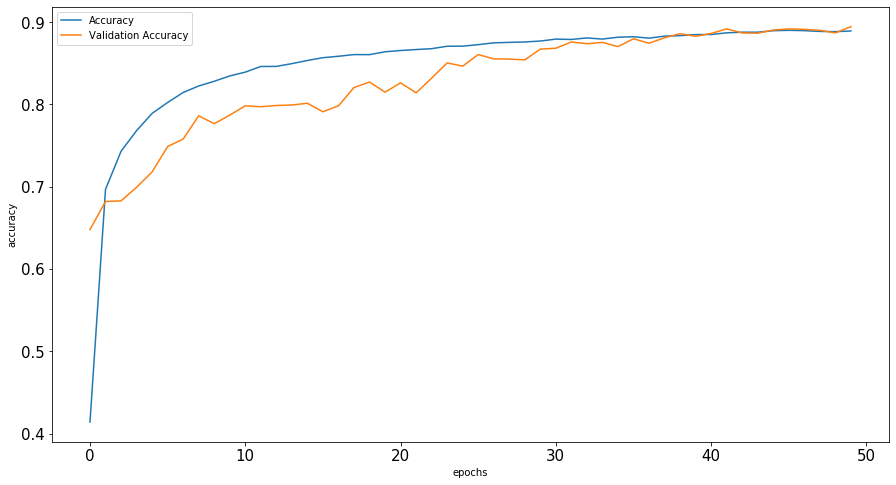

In [21]:
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy']);

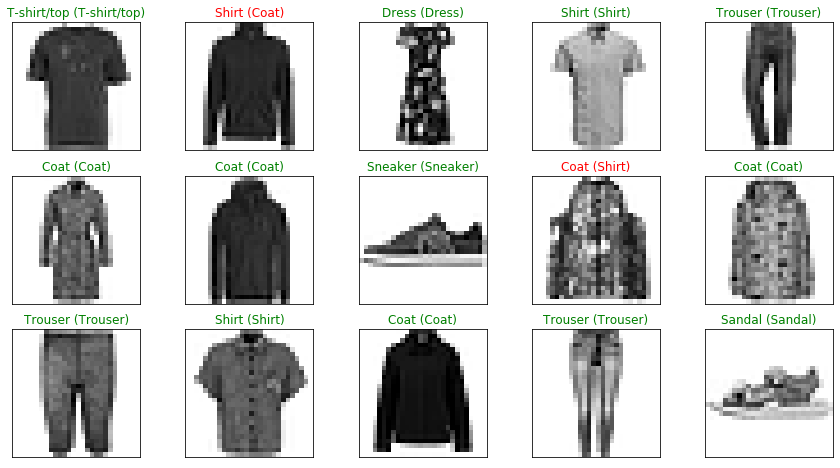

In [22]:
y_hat = model.predict(x_test)

figure = plt.figure()
# Plot a random sample of 10 test images, their predicted labels and ground truth
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]), cmap="binary")
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [0]:
model.save('mnist-classifier.h5')

In [24]:
!ls -l

total 2068
-rw-r--r-- 1 root root 2077632 Dec 30 09:43 mnist-classifier.h5
-rw-r--r-- 1 root root   29561 Dec 30 09:43 model.png
drwxr-xr-x 1 root root    4096 Dec 18 16:52 sample_data
